In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Step 1: Load the data
data = pd.read_csv('data_1000.csv')
print("First 5 rows of data:")
print()
data.head()

First 5 rows of data:



,ID,Age,Salary,Experience (Years)
0,1,33.312032,72936.50114,11.053004
1,2,36.109561,65107.62139,7.557620
2,3,42.869696,53421.21434,17.963350
3,4,26.088670,65325.47397,10.096720
4,5,24.368910,45689.41297,4.055183


In [7]:
# Check missing values
data.isnull().sum()

,0
ID,0
Age,20
Salary,20
Experience (Years),20


In [9]:
# Fill missing 'Age' and 'Salary' with their median
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Salary'].fillna(data['Salary'].median(), inplace=True)

# Fill missing 'Experience' with its median
data['Experience (Years)'].fillna(data['Experience (Years)'].median(), inplace=True)

<ipython-input-9-be9b09e4ad12>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-9-be9b09e4ad12>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [10]:
data.isnull().sum()

,0
ID,0
Age,0
Salary,0
Experience (Years),0


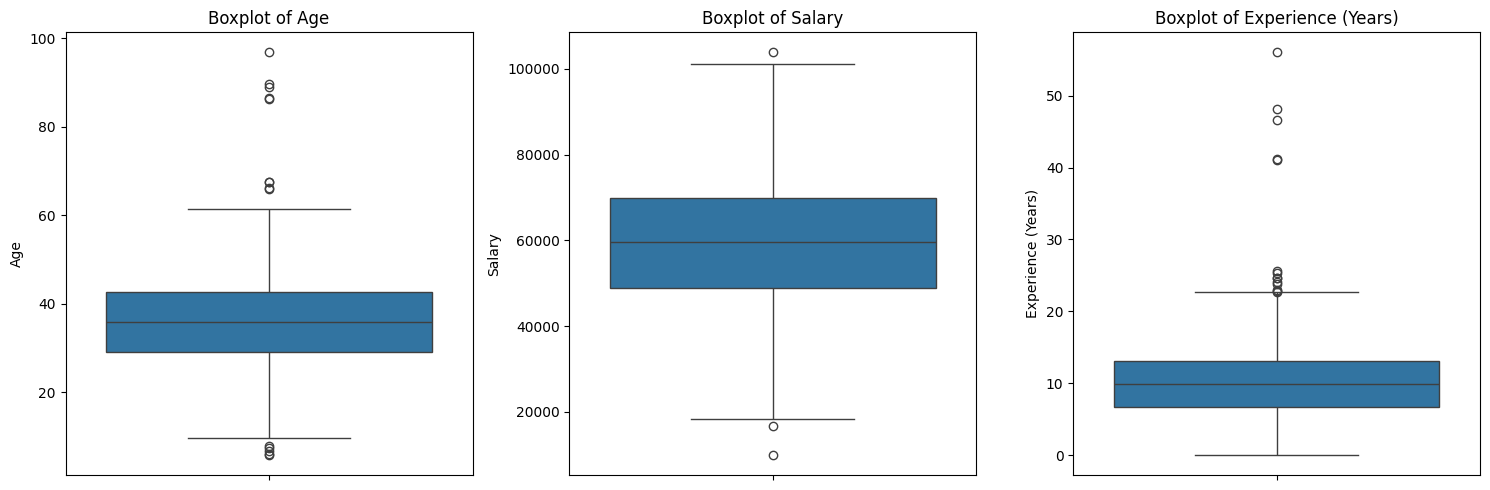

In [11]:
# Step 3: Handle outliers
# Visualize using boxplots
plt.figure(figsize=(15,5))
for i, column in enumerate(['Age', 'Salary', 'Experience (Years)']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [12]:
# Remove outliers using IQR (Interquartile Range) method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [13]:
# Apply outlier removal
for col in ['Age', 'Salary', 'Experience (Years)']:
    data = remove_outliers(data, col)

In [14]:
data.shape

(970, 4)

In [15]:
# Step 4: Feature scaling (Normalization)
scaler = StandardScaler()

In [17]:
# We will scale 'Age', 'Salary', and 'Experience'
features_to_scale = ['Age', 'Salary', 'Experience (Years)']
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

In [18]:
data.head()

,ID,Age,Salary,Experience (Years)
0,1,-0.254688,0.921797,0.274718
1,2,0.031003,0.387908,-0.475343
2,3,0.721366,-0.409043,1.757581
3,4,-0.992356,0.402765,0.069513
4,5,-1.167983,-0.936311,-1.226916


In [19]:
# Step 5: Split the data into training and testing sets
# Suppose 'Salary' is your target (if you want) — here we treat it as a feature though
X = data.drop('ID', axis=1)  # Features (dropping ID column)
y = np.random.randint(0, 2, size=X.shape[0])  # Dummy binary target for splitting

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print("\nShapes of train and test sets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes of train and test sets:
X_train: (776, 3)
X_test: (194, 3)
y_train: (776,)
y_test: (194,)
